In [1]:
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd

# %matplotlib inline
%matplotlib ipympl

In [2]:
# List all available parameters
par_df = nivapy.da.get_nve_hydapi_parameters()
par_df

,parameter,parameterName,parameterNameEng,unit
0,0,Nedbør,Precipitation,mm
1,1000,Vannstand,Stage,m
2,1001,Vannføring,Discharge,m³/s
3,1002,Vannhastighet,Water speed,m/s
4,1003,Vanntemperatur,Water temperature,°C
5,1004,Magasinvolum,Reservoir volume,millioner m³
6,1006,Ledningsevne,Conductivity,µS/cm
7,1012,Overvannstand kraftverk,Head water level-hydropow.,m
8,1200,Konsentrasjon suspendert min. materiale,Concentration suspended (inorg.) sedim.,mg/l
9,1208,Konsentrasjon organisk materiale,Concentration of organic material,mg/l


In [4]:
# List all stations
stn_df = nivapy.da.get_nve_hydapi_stations()
print(len(stn_df), "stations available.")
stn_df.head()

1789 stations available.


,station_id,station_name,latitude,longitude,utmEast_Z33,utmNorth_Z33,masl,riverName,councilNumber,councilName,...,culQ5,culQ10,culQ20,culQ50,culHm,culH5,culH10,culH20,culH50,seriesList
0,1.15.0,Femsjø,59.13015,11.48516,298887,6559841,81,Haldenvassdraget,3001,Halden,...,NaN,NaN,NaN,NaN,79.5551,79.6937,79.8507,80.0226,80.2810,"[{'parameterName': 'Vannstand', 'parameter': 1..."
1,1.198.0,Berg,59.92993,11.40768,299271,6649056,177,Riserelva,3026,Aurskog-Høland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'parameterName': 'Vannstand', 'parameter': 1..."
2,1.200.0,Lierelv,59.92038,11.53180,306146,6647624,134,Haldenvassdraget,3026,Aurskog-Høland,...,35.3131,36.5231,37.1222,37.4959,2.2503,2.3432,2.3588,2.3664,2.3711,"[{'parameterName': 'Vannstand', 'parameter': 1..."
3,1.40.0,Unnebergsbekken,11.14828,5.55338,-535845,1248998,0,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'parameterName': 'Vannstand', 'parameter': 1..."
4,1.41.0,Lognselva,11.14828,5.55338,-535845,1248998,0,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'parameterName': 'Vannstand', 'parameter': 1..."


In [5]:
# Map all stations
nivapy.spatial.quickmap(
    stn_df, cluster=True, kartverket=True, aerial_imagery=True, popup="station_id"
)

In [3]:
# Paths to files and folders

# This set of stations doesn't include previous versions of some of the stations,
# that have been discontinued (e.g. at Cægarrasjohka), therefore needs revisiting
nve_site_ids_fpath = r"../data/subcatchments_metadata/Subcatchments_existing_data_metadata.xlsx"
station_ids = pd.read_excel(
    nve_site_ids_fpath, sheet_name="NVE_datadownload_01-2022", index_col=0
)
station_ids.index

Index(['234.13.0', '234.14.0', '234.5.0', '234.2.0', '234.4.0', '234.10.0',
       '234.16.0', '234.18.0', '234.1.0'],
      dtype='object', name='stasjonID')

In [4]:
station_ids.index[0:2]

Index(['234.13.0', '234.14.0'], dtype='object', name='stasjonID')

In [5]:
# Define stations, parameters and time period of interest
stn_ids = station_ids.index
par_ids = [1001]
st_dt = "1900-01-01"
end_dt = "2022-01-01"

# Query
df = nivapy.da.query_nve_hydapi(stn_ids, par_ids, st_dt, end_dt, resolution=1440)
df

AttributeError: module 'datetime' has no attribute 'strptime'

See here for an interpretation of the correction and quality integer values: https://hydapi.nve.no/UserDocumentation/

Quality types:
Unknown = 0
Uncontrolled = 1
PrimaryControlled = 2
SecondaryControlled = 3

Correction type indicates whether the value has been corrected. e.g.:
0: No changes
1: Manual- or ice correction
2: Interpolation
3: Value computed with models or/and other series
4: Daily mean computed with arithmetic mean. (Only used on series where we normally should use discharge curve)
13: The value is calculated based on a similar station or a station close by
14: The value is missing, and is only calculated based on statistical information for the data series

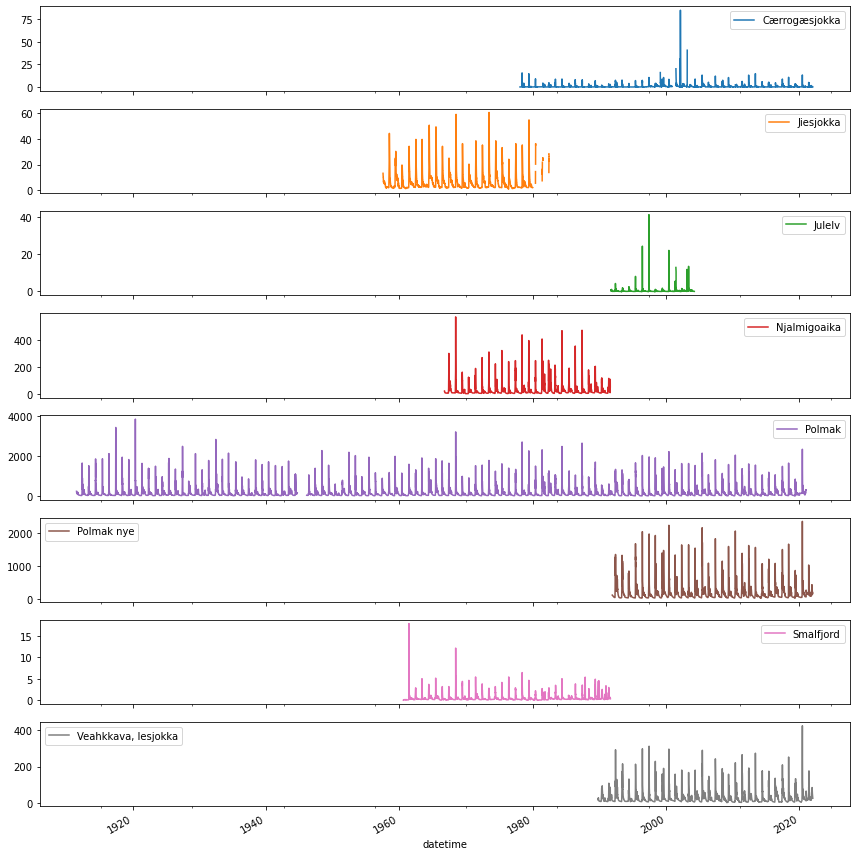

In [12]:
# Unstack
df2 = df[["datetime", "value", "station_name"]]
df2.set_index(["datetime", "station_name"], inplace=True)
df2 = df2.unstack("station_name")
df2.columns = df2.columns.droplevel(0)  # Remove multi-index on columns

# Plot
df2.plot(subplots=True, sharex=True, figsize=(12, 12))
plt.tight_layout()

In [26]:
df2.head()

station_name,Cærrogæsjokka,Jiesjokka,Julelv,Njalmigoaika,Polmak,Polmak nye,Smalfjord,"Veahkkava, Iesjokka"
datetime,,,,,,,,
1911-07-24 11:00:00+00:00,NaN,NaN,NaN,NaN,253.3038,NaN,NaN,NaN
1911-07-25 11:00:00+00:00,NaN,NaN,NaN,NaN,241.0981,NaN,NaN,NaN
1911-07-26 11:00:00+00:00,NaN,NaN,NaN,NaN,235.1423,NaN,NaN,NaN
1911-07-27 11:00:00+00:00,NaN,NaN,NaN,NaN,232.2008,NaN,NaN,NaN
1911-07-28 11:00:00+00:00,NaN,NaN,NaN,NaN,238.1080,NaN,NaN,NaN


In [36]:
df_stacked_fpath = r'../data/NVE/NVE_Q_download_2022-01-20_allinfo_stacked.csv'
df_unstacked_fpath = r'../data/NVE/NVE_Q_download_2022-01-20_unstacked.csv'

df.to_csv(df_stacked_fpath, index=False)
df2.to_csv(df_unstacked_fpath)

In [ ]:
df2['Cærrogæsjokka'].plot(figsize=(15,8), logy=True)
plt.grid(True)